## 1.Loading the Required Libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
from warnings import filterwarnings
filterwarnings('ignore')

In [156]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [157]:
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [158]:
from yellowbrick.cluster import KElbowVisualizer

In [238]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## 2.Loading the Dataset

In [160]:
df_cust=pd.read_csv('C:/Users/Desktop/imarticus/machine learning/Kaggle/cust_personality/marketing_campaign_1.csv',parse_dates=['Dt_Customer'])

In [161]:
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 3.Exploratory Data Analysis

In [162]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [163]:
df_cust.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [164]:
df_cust.shape

(2240, 29)

In [165]:
#Dropping the ID column since we do not require it for model building.

In [166]:
df_cust=df_cust.drop('ID',axis=1)

### Checking for duplicates

In [167]:
df_cust.duplicated().sum()

182

In [168]:
df_cust.loc[df_cust.Income.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
44,1975,Master,Married,7500.0,1,0,2013-02-10,19,3,1,10,3,2,12,3,2,0,3,5,0,0,0,0,0,0,3,11,0
46,1996,2n Cycle,Married,7500.0,0,0,2012-09-11,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
83,1963,Master,Together,38620.0,0,0,2013-11-05,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0


In [169]:
df_cust.loc[df_cust['Income']==38620.0]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
31,1963,Master,Together,38620.0,0,0,2013-11-05,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
83,1963,Master,Together,38620.0,0,0,2013-11-05,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0


We have 182 duplicate values in the dataset. We can drop them.

In [170]:
df_cust=df_cust.drop_duplicates(ignore_index=True,keep='first')

In [171]:
df_cust.duplicated().sum()

0

In [172]:
df_cust.shape

(2058, 28)

The duplicate values have been deleted now, and their indices have been replaced by next row of the dataset.

### Feature Engineering

In [173]:
#Adding a new column 'grocery purchase'
df_cust['grocery_purchase']=df_cust['MntWines']+df_cust['MntFruits']+df_cust['MntMeatProducts']+df_cust['MntFishProducts']+df_cust['MntSweetProducts']

In [174]:
#We can drop the redundant columns

In [175]:
df_cust=df_cust.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts'],axis=1)

In [176]:
#Adding a new column 'responded_back'
df_cust['responded_back']=df_cust['AcceptedCmp3']+df_cust['AcceptedCmp4']+df_cust['AcceptedCmp5']+df_cust['AcceptedCmp1']+df_cust['AcceptedCmp2']+df_cust['Response']

In [177]:
#Dropping the redundant columns

In [178]:
df_cust=df_cust.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response'],axis=1)

In [179]:
#Adding a new column 'Total_Purchase'
df_cust['Total_Purchase']=df_cust['NumDealsPurchases']+df_cust['NumWebPurchases']+df_cust['NumCatalogPurchases']+df_cust['NumStorePurchases']

In [180]:
#Dropping the redundant columns

In [181]:
df_cust=df_cust.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1)

In [182]:
#Adding two new columns 'age' and 'association_years' by using information from 'Year_Birth' and 'Dt_Customer'

In [183]:
current_year=dt.datetime.now().year
current_year

2023

In [184]:
df_cust['age']=current_year-df_cust['Year_Birth']

In [185]:
df_cust['association_years']=current_year-(pd.DatetimeIndex(df_cust['Dt_Customer']).year)

In [186]:
#Dropping off the redundant columns

In [187]:
df_cust=df_cust.drop(['Year_Birth','Dt_Customer'],axis=1)

In [188]:
#Checking the shape of the dataset

In [189]:
df_cust.shape

(2058, 16)

In [190]:
df_cust.describe()

,Income,Kidhome,Teenhome,Recency,MntGoldProds,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,grocery_purchase,responded_back,Total_Purchase,age,association_years
count,2034.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,52357.791544,0.445578,0.509232,48.951895,43.873178,5.319728,0.009718,3.0,11.0,562.367347,0.452381,14.869291,54.212828,9.968416
std,25526.956988,0.537556,0.546489,28.999189,52.126598,2.439907,0.098124,0.0,0.0,577.335025,0.891224,7.663430,11.973898,0.685621
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,4.000000,0.000000,0.000000,27.000000,9.000000
25%,35528.250000,0.000000,0.000000,24.000000,9.000000,3.000000,0.000000,3.0,11.0,55.000000,0.000000,8.000000,46.000000,9.000000
50%,51533.000000,0.000000,0.000000,49.000000,24.000000,6.000000,0.000000,3.0,11.0,341.500000,0.000000,15.000000,53.000000,10.000000
75%,68480.750000,1.000000,1.000000,74.000000,56.000000,7.000000,0.000000,3.0,11.0,963.500000,1.000000,21.000000,64.000000,10.000000
max,666666.000000,2.000000,2.000000,99.000000,362.000000,20.000000,1.000000,3.0,11.0,2491.000000,5.000000,44.000000,130.000000,11.000000


### Checking for outliers

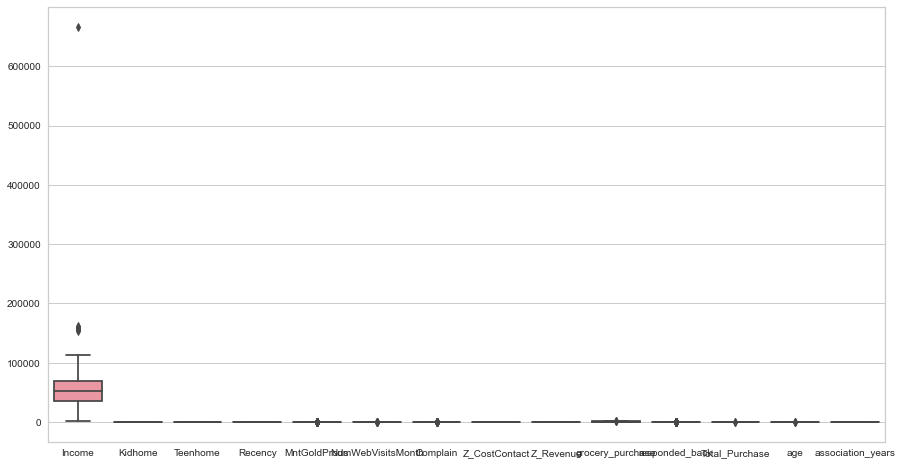

In [191]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df_cust)
plt.show()

We can find there are some columns with outliers. We need to treat them.

In [192]:
#Treating the outliers

In [193]:
num=df_cust.select_dtypes(include=np.number)
num.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntGoldProds',
       'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'grocery_purchase', 'responded_back', 'Total_Purchase', 'age',
       'association_years'],
      dtype='object')

In [194]:
def boundaries(data,variable):
    LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

In [195]:
cols=[ 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntGoldProds', 'NumWebVisitsMonth', 'Z_CostContact',
       'Z_Revenue', 'grocery_purchase', 'responded_back', 'Total_Purchase','age',
       'association_years']

In [196]:
for col in cols:
    LL,UL=boundaries(df_cust,col)
    
    df_cust[col]=np.where(df_cust[col]<LL,LL,
                         np.where(df_cust[col]>UL,UL,df_cust[col]))

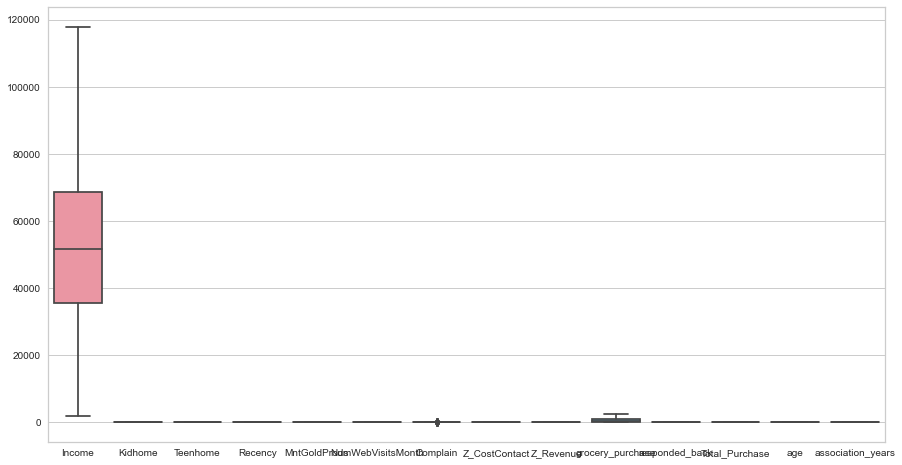

In [197]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df_cust)
plt.show()

We can see that the outliers have been treated now.

### Checking for missing values

In [198]:
df_cust.isnull().sum()

Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Recency               0
MntGoldProds          0
NumWebVisitsMonth     0
Complain              0
Z_CostContact         0
Z_Revenue             0
grocery_purchase      0
responded_back        0
Total_Purchase        0
age                   0
association_years     0
dtype: int64

We can see that there are 24 missing values in Income column. We can fill it based on their purchasing capacity.

In [199]:
missing_index=df_cust.loc[df_cust.Income.isnull(),['Income','Total_Purchase']]

In [200]:
df1=df_cust.groupby('Total_Purchase')['Income'].median()
df1

Total_Purchase
0.0      61385.25
1.0       6835.00
2.0       6560.00
4.0      32583.00
5.0      31562.50
6.0      31878.00
7.0      33585.00
8.0      34941.00
9.0      33390.00
10.0     33242.00
11.0     38177.00
12.0     45006.00
13.0     49514.00
14.0     56640.50
15.0     57864.00
16.0     61197.50
17.0     65104.00
18.0     65748.00
19.0     68411.00
20.0     65926.00
21.0     68655.00
22.0     70165.00
23.0     68118.00
24.0     64519.50
25.0     68117.00
26.0     69988.00
27.0     70080.50
28.0     67353.00
29.0     67430.00
30.0     66283.50
31.0     54693.00
32.0     65666.00
33.0     59394.50
34.0     70971.00
35.0     66465.00
37.0    117909.50
39.0     67309.00
40.5     60178.25
Name: Income, dtype: float64

In [201]:
df_cust.loc[missing_index.index,'Income']=df_cust.loc[missing_index.index,'Total_Purchase'].apply(lambda x:df1.loc[x])

In [202]:
df_cust.isnull().sum()

Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Recency              0
MntGoldProds         0
NumWebVisitsMonth    0
Complain             0
Z_CostContact        0
Z_Revenue            0
grocery_purchase     0
responded_back       0
Total_Purchase       0
age                  0
association_years    0
dtype: int64

The missing values have been treated now.

### Test for Correlation

In [203]:
vcorr=df_cust.corr()

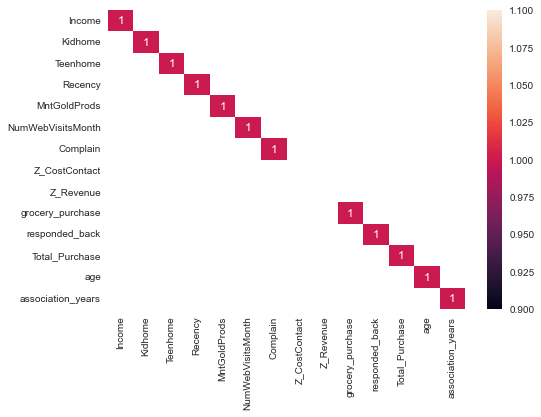

In [204]:
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can see there is no strong correlation between the features.

In [205]:
df_cust.shape

(2058, 16)

In [206]:
df_cust.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntGoldProds', 'NumWebVisitsMonth', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'grocery_purchase', 'responded_back',
       'Total_Purchase', 'age', 'association_years'],
      dtype='object')

### Dummy Encoding the Categorical Variables.

In [207]:
df_cust_dummy=pd.get_dummies(df_cust,drop_first=True)

In [208]:
df_cust_dummy.shape

(2058, 25)

## 4.KMeansClustering

In [209]:
for k in range(2,10):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(df_cust_dummy)
    print('The SH Score for {} is {}'.format(k,silhouette_score(df_cust_dummy,km.labels_)))

The SH Score for 2 is 0.6055286723967346
The SH Score for 3 is 0.5458188497034212
The SH Score for 4 is 0.5272957166451545
The SH Score for 5 is 0.5276172866454558
The SH Score for 6 is 0.5176437816958706
The SH Score for 7 is 0.5218499635765261
The SH Score for 8 is 0.5261699383313699
The SH Score for 9 is 0.5211279617405798


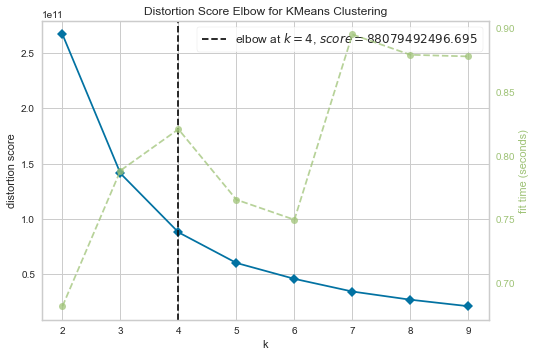

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [210]:
visualizer=KElbowVisualizer(km,k=(2,10))

visualizer.fit(df_cust_dummy)
visualizer.show()

In [211]:
km=KMeans(n_clusters=4)
km.fit(df_cust_dummy)

KMeans(n_clusters=4)

In [212]:
#Predicting the clusters
cluster_predict=km.predict(df_cust_dummy)

In [213]:
customer_kmeans=df_cust_dummy.copy()
customer_kmeans['clusters']=cluster_predict

In [214]:
score=silhouette_score(df_cust_dummy,km.labels_)
score

0.5272957166451545

In [215]:
#We will convert the cluster names from [0,1,2,3] to[1,2,3,4]

In [216]:
def cluster(i):
    if i==0:
        i=1
    elif i==1:
        i=2
    elif i==2:
        i=3
    else:
        i=4
    return i    

In [217]:
customer_kmeans['clusters']=customer_kmeans['clusters'].apply(cluster)

In [218]:
customer_kmeans

,Income,Kidhome,Teenhome,Recency,MntGoldProds,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,grocery_purchase,responded_back,Total_Purchase,age,association_years,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,clusters
0,58138.0,0.0,0.0,58.0,88.0,7.0,0,3.0,11.0,1529.00,1.0,25.0,66.0,11.0,0,1,0,0,0,0,0,1,0,0,0,4
1,46344.0,1.0,1.0,38.0,6.0,5.0,0,3.0,11.0,21.00,0.0,6.0,69.0,9.0,0,1,0,0,0,0,0,1,0,0,0,3
2,71613.0,0.0,0.0,26.0,42.0,4.0,0,3.0,11.0,734.00,0.0,21.0,58.0,10.0,0,1,0,0,0,0,0,0,1,0,0,1
3,26646.0,1.0,0.0,26.0,5.0,6.0,0,3.0,11.0,48.00,0.0,8.0,39.0,9.0,0,1,0,0,0,0,0,0,1,0,0,2
4,58293.0,1.0,0.0,94.0,15.0,5.0,0,3.0,11.0,407.00,0.0,19.0,42.0,9.0,0,0,0,1,0,0,1,0,0,0,0,4
5,62513.0,0.0,1.0,16.0,14.0,6.0,0,3.0,11.0,702.00,0.0,22.0,56.0,10.0,0,0,1,0,0,0,0,0,1,0,0,4
6,55635.0,0.0,1.0,34.0,27.0,6.0,0,3.0,11.0,563.00,0.0,21.0,52.0,11.0,0,1,0,0,0,1,0,0,0,0,0,4
7,33454.0,1.0,0.0,32.0,23.0,8.0,0,3.0,11.0,146.00,0.0,10.0,38.0,10.0,0,0,0,1,0,0,1,0,0,0,0,3
8,30351.0,1.0,0.0,19.0,2.0,9.0,0,3.0,11.0,44.00,1.0,6.0,49.0,10.0,0,0,0,1,0,0,0,0,1,0,0,2
9,5648.0,1.0,1.0,68.0,13.0,13.0,0,3.0,11.0,36.00,1.0,2.0,73.0,9.0,0,0,0,1,0,0,0,0,1,0,0,2


Since we have classified the customers into different clusters, let us explore about their behaviour.Let us add the clusters column to our original dataset and then study the behaviour.

## 5.Visualisations to study Cluster Behaviour

In [219]:
df_cust1=df_cust.copy(deep=True)

In [220]:
df_cust1['clusters']=customer_kmeans['clusters']

In [221]:
df_cust1.shape

(2058, 17)

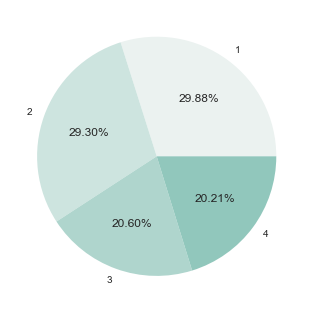

In [222]:
#Distribution of Clusters
keys=[1,2,3,4]
plt.pie(df_cust1['clusters'].value_counts(),labels=keys,colors=sns.color_palette('light:#5A9'),autopct='%.2f%%')
plt.show()

We can see that we have approximately 30% people in Cluster 1.

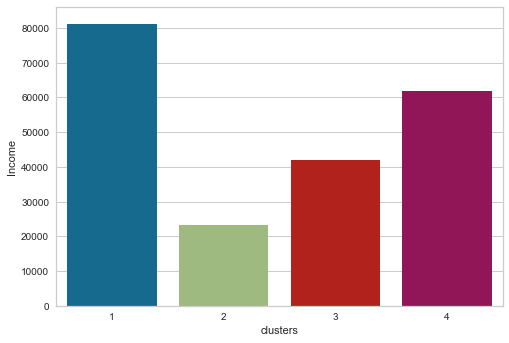

In [223]:
#Plotting how Income varies with the clusters 
sns.barplot(x='clusters',y='Income',data=df_cust1,errwidth=0)
plt.show()

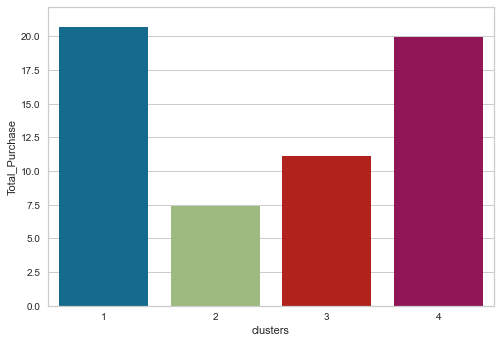

In [224]:
#Plotting how Total_Purchase varies with the clusters 
sns.barplot(x='clusters',y='Total_Purchase',data=df_cust1,errwidth=0)
plt.show()

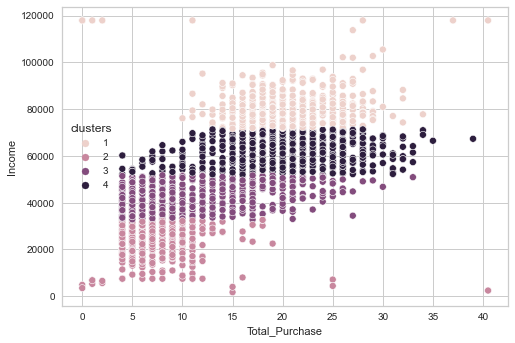

In [225]:
#Scatterplot showing realtionship between Income and 'Total_Purchase'
sns.scatterplot(x='Total_Purchase',y='Income',hue='clusters',data=df_cust1)
plt.show()

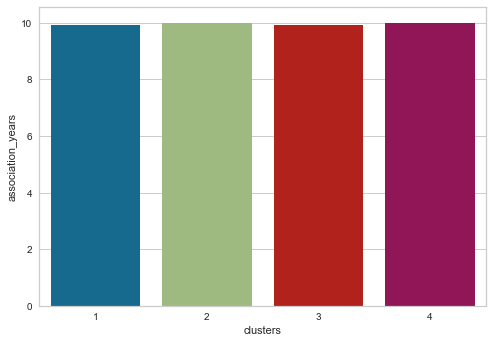

In [226]:
#Plotting how association_years varies with the clusters 
sns.barplot(x='clusters',y='association_years',data=df_cust1,errwidth=0)
plt.show()

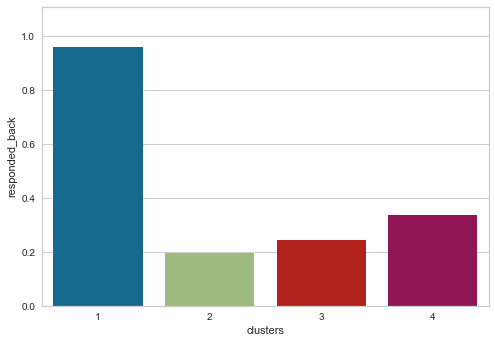

In [227]:
#Plotting how 'responded back' varies with the clusters 
sns.barplot(x='clusters',y='responded_back',data=df_cust1,errwidth=0)
plt.show()

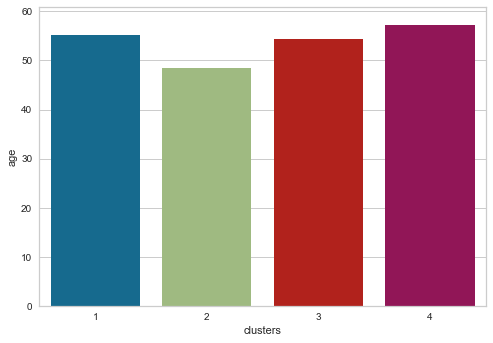

In [228]:
#Plotting how Age varies with the clusters 
sns.barplot(x='clusters',y='age',data=df_cust1,errwidth=0)
plt.show()

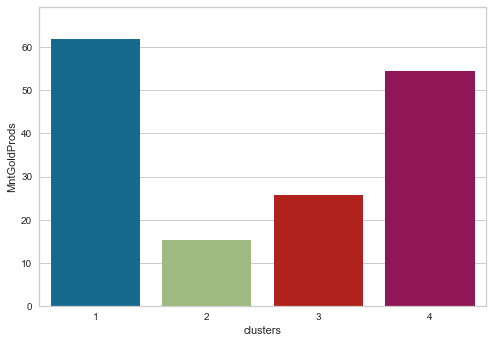

In [229]:
#Plotting how MntGolProds varies with the clusters 
sns.barplot(x='clusters',y='MntGoldProds',data=df_cust1,errwidth=0)
plt.show()

Cluster_Characteristics

1.Cluster 1 has people with highest income while 2 has the lowest income.
2.Total_purchases in last 2 years has been highest for Cluster 1 while it is lowest for cluster 2.
3.People from all clusters have same years of association with the company.
4.People from cluster 1 responded back towards company promotions highest number of times.
5.The age of people in cluster 4 is highest as compared to other clusters.
6.Amount spent in purchasing gold has been highest for cluster 1.

In [233]:
df_cust2=df_cust_dummy.copy(deep=True)

In [234]:
df_cust2.head()

,Income,Kidhome,Teenhome,Recency,MntGoldProds,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,grocery_purchase,responded_back,Total_Purchase,age,association_years,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0.0,0.0,58.0,88.0,7.0,0,3.0,11.0,1529.0,1.0,25.0,66.0,11.0,0,1,0,0,0,0,0,1,0,0,0
1,46344.0,1.0,1.0,38.0,6.0,5.0,0,3.0,11.0,21.0,0.0,6.0,69.0,9.0,0,1,0,0,0,0,0,1,0,0,0
2,71613.0,0.0,0.0,26.0,42.0,4.0,0,3.0,11.0,734.0,0.0,21.0,58.0,10.0,0,1,0,0,0,0,0,0,1,0,0
3,26646.0,1.0,0.0,26.0,5.0,6.0,0,3.0,11.0,48.0,0.0,8.0,39.0,9.0,0,1,0,0,0,0,0,0,1,0,0
4,58293.0,1.0,0.0,94.0,15.0,5.0,0,3.0,11.0,407.0,0.0,19.0,42.0,9.0,0,0,0,1,0,0,1,0,0,0,0


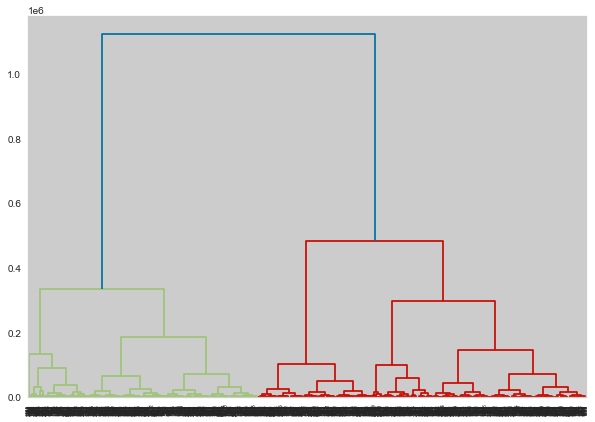

In [236]:
plt.figure(figsize=(10,7))
dend=sch.dendrogram(sch.linkage(df_cust2,method='ward'))
#plt.axhline(y=6,c='r')
plt.show()

In [239]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(df_cust2)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [242]:
df_cust3=df_cust.copy(deep=True)

In [244]:
df_cust3['clusters']=cluster.labels_

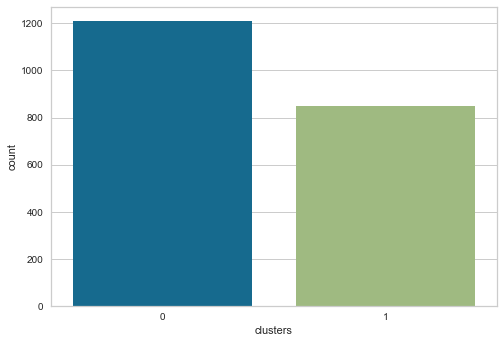

In [245]:
sns.countplot(x='clusters',data=df_cust3)
plt.show()